In [2]:
# ! pip install tensorflow
! pip install pandas

     --------------------------------------- 10.4/10.4 MB 54.7 MB/s eta 0:00:00
     ------------------------------------- 498.1/498.1 kB 32.5 MB/s eta 0:00:00


In [3]:
import tensorflow as tf

In [6]:
inputs = tf.keras.layers.Input(shape = (20, 1), name = "input")
outputs = tf.keras.layers.Dense(units = 10, activation='softmax', name = "output_softmax")(inputs)

model_1 = tf.keras.Model(inputs = inputs, outputs = outputs)
model_1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 20, 1)]           0         
                                                                 
 output_softmax (Dense)      (None, 20, 10)            20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [11]:
## Hidden
Input_size = 20
inputs = tf.keras.layers.Input(shape = Input_size, name = "input")
hidden1 = tf.keras.layers.Dense(units = 10, activation='relu',
                                name = "hidden1")(inputs)
# hidden1 = tf.keras.layers.Dense(units = 10, activation=tf.nn.relu, name = "hidden1")(inputs)

outputs = tf.keras.layers.Dense(units = 2, activation='softmax', name = 'output')(hidden1)
# outputs = tf.keras.layers.Dense(units = 2, activation=tf.nn.softmax, name = 'output')(hidden1)


model_2 = tf.keras.Model(inputs = inputs, outputs = outputs)
model_2.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 20)]              0         
                                                                 
 hidden1 (Dense)             (None, 10)                210       
                                                                 
 output (Dense)              (None, 2)                 22        
                                                                 
Total params: 232
Trainable params: 232
Non-trainable params: 0
_________________________________________________________________


In [13]:
INPUT_SIZE = 20

inputs = tf.keras.layers.Input(shape = INPUT_SIZE, name = "input")
dropout = tf.keras.layers.Dropout(rate = 0.2, name = 'dropout')(inputs)
hidden = tf.keras.layers.Dense(units= 10, activation='relu', name = 'hidden')(dropout)
outputs = tf.keras.layers.Dense(units= 2, activation='softmax', name = 'output')(hidden)

model_3 = tf.keras.Model(inputs = inputs, outputs = outputs)

model_3.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 20)]              0         
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 hidden (Dense)              (None, 10)                210       
                                                                 
 output (Dense)              (None, 2)                 22        
                                                                 
Total params: 232
Trainable params: 232
Non-trainable params: 0
_________________________________________________________________


In [18]:
# 1D conv layer
INPUT_SIZE = (20, 1)
inputs = tf.keras.layers.Input(shape = INPUT_SIZE)
conv = tf.keras.layers.Conv1D(filters = 10,
                             kernel_size=3, padding= "same",
                             activation='relu')(inputs)

model_4 = tf.keras.Model(inputs = inputs, outputs = conv)

model_4.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 20, 1)]           0         
                                                                 
 conv1d_4 (Conv1D)           (None, 20, 10)            40        
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [20]:
inputs = tf.keras.layers.Input(shape = (20, 1), name = 'input')
dropout = tf.keras.layers.Dropout(rate = 0.2, name = 'dropout')(inputs)
conv = tf.keras.layers.Conv1D(filters = 10,
                             kernel_size=3,
                             padding = 'same',
                             activation='relu',
                             name = 'Conv')(dropout)
max_pool = tf.keras.layers.MaxPool1D(pool_size=3, name = 'max_pool')(conv)
flatten = tf.keras.layers.Flatten(name = 'flatten')(max_pool)
hidden = tf.keras.layers.Dense(units = 50, activation='relu', name = 'hidden')(flatten)
outputs = tf.keras.layers.Dense(units = 10, activation='softmax', 
                               name = 'outputs')(hidden)

model_functionAPI = tf.keras.Model(inputs = inputs, outputs = outputs, 
                                  name = "functionAPI")
model_functionAPI.summary()


Model: "functionAPI"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 20, 1)]           0         
                                                                 
 dropout (Dropout)           (None, 20, 1)             0         
                                                                 
 Conv (Conv1D)               (None, 20, 10)            40        
                                                                 
 max_pool (MaxPooling1D)     (None, 6, 10)             0         
                                                                 
 flatten (Flatten)           (None, 60)                0         
                                                                 
 hidden (Dense)              (None, 50)                3050      
                                                                 
 outputs (Dense)             (None, 10)                

In [21]:
## Model 구축
## Sequential

model = tf.keras.Sequential(name = 'Sequential_API')
model.add(tf.keras.layers.Input(shape = (32,), name = 'input'))
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu', name = 'Dense1'))
model.add(tf.keras.layers.Dense(units = 64, activation='relu', name = 'Dense2'))
model.add(tf.keras.layers.Dense(units = 10, activation='softmax', name = 'Outputs'))

model.summary()

Model: "Sequential_API"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 64)                2112      
                                                                 
 Dense2 (Dense)              (None, 64)                4160      
                                                                 
 Outputs (Dense)             (None, 10)                650       
                                                                 
Total params: 6,922
Trainable params: 6,922
Non-trainable params: 0
_________________________________________________________________


In [22]:
## Functional API
inputs = tf.keras.layers.Input(shape = (32,), name = 'input')
Dense1 = tf.keras.layers.Dense(units = 64, activation='relu', name = 'dense1')(inputs)
Dense2 = tf.keras.layers.Dense(units = 64, activation='relu', name = 'dense2')(Dense1)
outputs = tf.keras.layers.Dense(units = 10, activation='softmax', name = 'outputs')(Dense2)

model_function = tf.keras.Model(inputs = inputs, outputs = outputs, 
                                name = 'Functional_API')

model_function.summary()

Model: "Functional_API"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32)]              0         
                                                                 
 dense1 (Dense)              (None, 64)                2112      
                                                                 
 dense2 (Dense)              (None, 64)                4160      
                                                                 
 outputs (Dense)             (None, 10)                650       
                                                                 
Total params: 6,922
Trainable params: 6,922
Non-trainable params: 0
_________________________________________________________________


In [24]:
##Custom layers
class Customlayer(tf.keras.layers.Layer):
    def __init__(self, hidden1, hidden2, output_layer):
        super(Customlayer, self).__init__()
        self.hidden1 = hidden1
        self.hidden2 = hidden2
        self.output_layer = output_layer
        
    def build(self, inputs):
        self.dense_layer1 = tf.keras.layers.Dense(units = self.hidden1, 
                                                 activation= "relu", name = 'Dense1')
        self.dense_layer2 = tf.keras.layers.Dense(units = self.hidden2,
                                                 activation='relu', name = 'Dense2')
        self.output_layers = tf.keras.layers.Dense(units = self.output_layer,
                                                  activation='softmax', name = 'output')
        
        
    def call(self, inputs):
        x = self.dense_layer1(inputs)
        x = self.dense_layer2(x)
        
        return self.output_layers(x)

In [25]:
model = tf.keras.Sequential(name = 'Custom_layer')
model.add(tf.keras.layers.Input(shape = (32,)))
model.add(Customlayer(64, 64, 10))
model.summary()

Model: "Custom_layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 customlayer (Customlayer)   (None, 10)                6922      
                                                                 
Total params: 6,922
Trainable params: 6,922
Non-trainable params: 0
_________________________________________________________________


In [28]:
## Subclassing

class MyModel(tf.keras.Model):
    def __init__(self, hidden1, hidden2, output_layers):
        super(MyModel, self).__init__(name = 'MyModel')
        self.dense1 = tf.keras.layers.Dense(units = hidden1, activation = 'relu',
                                           name = 'dense1')
        self.dense2 = tf.keras.layers.Dense(units = hidden2, activation = 'relu',
                                           name = 'dense2')
        self.output_layer = tf.keras.layers.Dense(units = output_layers,
                                                 activation='softmax',
                                                 name = 'output_layer')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        
        return self.output_layer(x)

In [30]:
model_sub = MyModel(64, 64, 10)

# model_sub.summary()

model_sub.complile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])

model_sub.fit(train_input, train_target, epochs = 20,
             batch_size = 64)

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [31]:
import numpy as np

In [32]:
dataset = np.loadtxt('../dataset/pima-indians-diabetes.csv', delimiter = ',')
print(dataset.shape)

(768, 9)


In [34]:
X = dataset[:, 0:8]
Y = dataset[:, -1]

print(X)
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 

In [48]:
## Sequential

# model = tf.keras.Sequential(name = 'Sequential')
# model.add(tf.keras.layers.Input(shape = (8, ), name = 'input'))
# model.add(tf.keras.layers.Dense(units = 12, activation= 'relu', name = 'dense1'))
# model.add(tf.keras.layers.Dense(units = 8, activation= 'relu', name = 'dense2'))
# model.add(tf.keras.layers.Dense(units = 1, activation= 'sigmoid', name = 'output'))

## Functional API
# inputs = tf.keras.layers.Input(shape = (8,), name = 'input')
# dense1 = tf.keras.layers.Dense(units = 12, activation='relu', name = 'dense1')(inputs)
# dense2 = tf.keras.layers.Dense(units = 8, activation='relu', name = 'dense2')(dense1)
# outputs = tf.keras.layers.Dense(units =1 , activation='sigmoid', name = 'outputs')(dense2)
# model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'Functional_API')

# model.summary()

class Mymodel(tf.keras.Model):
    def __init__(self, hidden1, hidden2, outputs):
        super(Mymodel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(units = hidden1, activation=tf.nn.relu, name = 'dense1')
        self.dense2 = tf.keras.layers.Dense(units = hidden2, activation=tf.nn.relu, name = 'dense2')
        self.outputs = tf.keras.layers.Dense(units = outputs, activation=tf.nn.sigmoid, name = 'output')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        
        return self.outputs(x)

model = Mymodel(12, 8, 1)

In [51]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = './model_save/\
{epoch:2d}_{val_loss:.4f}.hdf5', monitor = 'val_loss',
                                               verbose = 1,
                                               save_best_only=True,
                                               save_weights_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                 patience = 10)

In [53]:
model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['acc'])
history = model.fit(X, Y, epochs = 200, batch_size = 70, validation_split=0.2,
         callbacks=[checkpoint, early_stopping])



Epoch 1/200
1/9 [==>...........................] - ETA: 2s - loss: 10.1987 - acc: 0.3714
Epoch 1: val_loss improved from 10.54315 to 5.33362, saving model to ./model_save\ 1_5.3336.hdf5
9/9 [==============================] - 0s 16ms/step - loss: 8.4997 - acc: 0.3485 - val_loss: 5.3336 - val_acc: 0.4351
Epoch 2/200
1/9 [==>...........................] - ETA: 0s - loss: 7.2199 - acc: 0.3714
Epoch 2: val_loss improved from 5.33362 to 2.76299, saving model to ./model_save\ 2_2.7630.hdf5
9/9 [==============================] - 0s 5ms/step - loss: 4.3146 - acc: 0.4186 - val_loss: 2.7630 - val_acc: 0.5455
Epoch 3/200
1/9 [==>...........................] - ETA: 0s - loss: 4.1684 - acc: 0.4857
Epoch 3: val_loss improved from 2.76299 to 1.99900, saving model to ./model_save\ 3_1.9990.hdf5
9/9 [==============================] - 0s 5ms/step - loss: 2.7443 - acc: 0.5717 - val_loss: 1.9990 - val_acc: 0.6494
Epoch 4/200
1/9 [==>...........................] - ETA: 0s - loss: 1.8923 - acc: 0.6429
Epoch 

9/9 [==============================] - 0s 5ms/step - loss: 0.5913 - acc: 0.7150 - val_loss: 0.5986 - val_acc: 0.6429
Epoch 57/200
1/9 [==>...........................] - ETA: 0s - loss: 0.5478 - acc: 0.7286
Epoch 57: val_loss did not improve from 0.59856
9/9 [==============================] - 0s 4ms/step - loss: 0.5909 - acc: 0.7182 - val_loss: 0.6011 - val_acc: 0.6364
Epoch 58/200
1/9 [==>...........................] - ETA: 0s - loss: 0.6042 - acc: 0.7429
Epoch 58: val_loss did not improve from 0.59856
9/9 [==============================] - 0s 4ms/step - loss: 0.5863 - acc: 0.7182 - val_loss: 0.6003 - val_acc: 0.6623
Epoch 59/200
1/9 [==>...........................] - ETA: 0s - loss: 0.5532 - acc: 0.6714
Epoch 59: val_loss did not improve from 0.59856
9/9 [==============================] - 0s 4ms/step - loss: 0.5861 - acc: 0.7166 - val_loss: 0.5990 - val_acc: 0.6429
Epoch 60/200
1/9 [==>...........................] - ETA: 0s - loss: 0.5651 - acc: 0.7429
Epoch 60: val_loss improved from

9/9 [==============================] - 0s 4ms/step - loss: 0.5576 - acc: 0.7264 - val_loss: 0.5942 - val_acc: 0.6429
Epoch 88/200
1/9 [==>...........................] - ETA: 0s - loss: 0.4840 - acc: 0.7714
Epoch 88: val_loss did not improve from 0.59370
9/9 [==============================] - 0s 4ms/step - loss: 0.5570 - acc: 0.7313 - val_loss: 0.5951 - val_acc: 0.6688
Epoch 89/200
1/9 [==>...........................] - ETA: 0s - loss: 0.4971 - acc: 0.7857
Epoch 89: val_loss did not improve from 0.59370
9/9 [==============================] - 0s 4ms/step - loss: 0.5570 - acc: 0.7264 - val_loss: 0.5955 - val_acc: 0.6558
Epoch 90/200
1/9 [==>...........................] - ETA: 0s - loss: 0.5615 - acc: 0.7000
Epoch 90: val_loss did not improve from 0.59370
9/9 [==============================] - 0s 4ms/step - loss: 0.5548 - acc: 0.7280 - val_loss: 0.5943 - val_acc: 0.6429


In [46]:
model.summary()

Model: "mymodel_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense1 (Dense)              multiple                  108       
                                                                 
 dense2 (Dense)              multiple                  104       
                                                                 
 output (Dense)              multiple                  9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [60]:
np.max(history.history['val_acc'])
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [58]:
!pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 51.1 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ---------------------------------------- 163.6/163.6 kB ? eta 0:00:00
     ------------------------------------- 965.4/965.4 kB 59.7 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 76.7 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)


In [59]:
import matplotlib.pyplot as plt

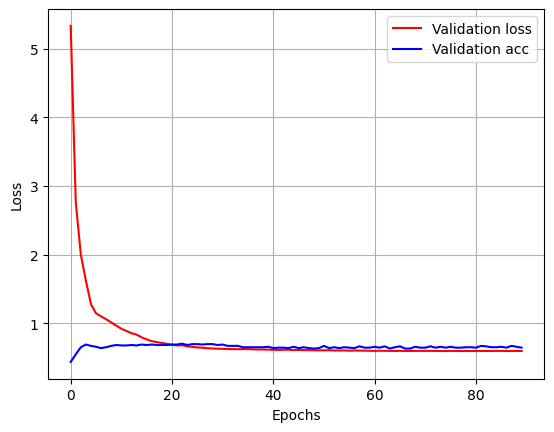

In [63]:
plt.plot(history.history['val_loss'], '-r', label = 'Validation loss')
plt.plot(history.history['val_acc'], '-b', label = 'Validation acc')
plt.legend()
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()